In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from gensim.models import Word2Vec

In [2]:
def get_edge_prob(G, src, dst, p, q):
    unnormalized_probs = []
    for dst_nbr in sorted(G.neighbors(dst)):
        if dst_nbr == src:
            unnormalized_probs.append(1/p)
        elif G.has_edge(dst_nbr, src):
            unnormalized_probs.append(1)
        else:
            unnormalized_probs.append(1/q)
    Z = sum(unnormalized_probs)
    normalized_probs = [float(u_prob)/Z for u_prob in unnormalized_probs]
    
    return normalized_probs

In [4]:
def get_edge_probs(G, p, q, undirected=True):
    edge_probs = {}
    for edge in G.edges():
        edge_probs[edge] = get_edge_prob(G, edge[0], edge[1], p, q)
        if undirected:
            edge_probs[(edge[1], edge[0])] = get_edge_prob(G, edge[1], edge[0], p, q)
    return edge_probs

In [5]:
def random_walk(G, walk_length, start_node, p, q):
    edge_probs = get_edge_probs(G, p, q)
    
    walk = [start_node]
    while len(walk) < walk_length:
        curr = walk[-1]
        nbrs = sorted(G.neighbors(curr))
        if len(nbrs) > 0:
            if len(walk) == 1:
                nxt = np.random.choice(nbrs, size=1, p=[1/len(nbrs)]*len(nbrs))[0]
                walk.append(nxt)
            else:
                prev = walk[-2]
                nxt = np.random.choice(nbrs, size=1, p=edge_probs[(prev, curr)])[0]
                walk.append(nxt)
        else:
            break
            
    return walk

In [6]:
def simulate_walks(G, num_walks, walk_length, p, q):
    walks = []
    nodes = list(G.nodes())
    print("Walk iteration:")
    for i in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walks.append(random_walk(G, walk_length, node, p, q))
        print("%d/%d" % (i+1, num_walks))
    return walks

In [7]:
G = nx.karate_club_graph()

In [10]:
"""Girvan-Newman Clustering"""
def wrap_bw(H):
    bw = nx.edge_betweenness_centrality(H, normalized=False)
    mx = max(bw.values())
    for e in sorted(bw.keys()):
        if bw[e] == mx:
            return e

In [11]:
splits = list(nx.algorithms.community.centrality.girvan_newman(G, most_valuable_edge=wrap_bw))

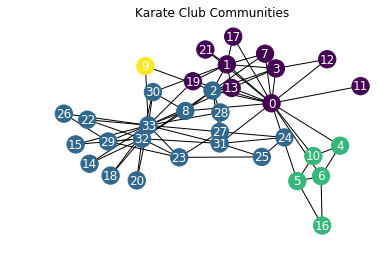

In [12]:
split_number = 2
color_map = {}
for i in range(len(splits[split_number])):
    for node in list(splits[split_number][i]):
        color_map[node] = i/len(splits[split_number])
        
values = [color_map.get(node, 0.25) for node in G.nodes()]
plt.title("Karate Club Communities")
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

In [13]:
walks = simulate_walks(G, num_walks=128, walk_length=15, p=1, q=2)

Walk iteration:
1/128
2/128
3/128
4/128
5/128
6/128
7/128
8/128
9/128
10/128
11/128
12/128
13/128
14/128
15/128
16/128
17/128
18/128
19/128
20/128
21/128
22/128
23/128
24/128
25/128
26/128
27/128
28/128
29/128
30/128
31/128
32/128
33/128
34/128
35/128
36/128
37/128
38/128
39/128
40/128
41/128
42/128
43/128
44/128
45/128
46/128
47/128
48/128
49/128
50/128
51/128
52/128
53/128
54/128
55/128
56/128
57/128
58/128
59/128
60/128
61/128
62/128
63/128
64/128
65/128
66/128
67/128
68/128
69/128
70/128
71/128
72/128
73/128
74/128
75/128
76/128
77/128
78/128
79/128
80/128
81/128
82/128
83/128
84/128
85/128
86/128
87/128
88/128
89/128
90/128
91/128
92/128
93/128
94/128
95/128
96/128
97/128
98/128
99/128
100/128
101/128
102/128
103/128
104/128
105/128
106/128
107/128
108/128
109/128
110/128
111/128
112/128
113/128
114/128
115/128
116/128
117/128
118/128
119/128
120/128
121/128
122/128
123/128
124/128
125/128
126/128
127/128
128/128


In [14]:
walks_str = [list(map(str, walk)) for walk in walks]

In [15]:
model = Word2Vec(walks_str, size=2, window=10, min_count=0, sg=1, workers=8, iter=1)

In [16]:
vocab = model.wv.vocab
embeddings = np.array([model.wv[x] for x in vocab])
labels = [x for x in vocab]
colors = [color_map[int(x)] for x in vocab]

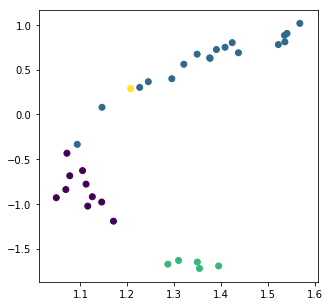

In [17]:
figure = plt.figure(figsize=(5,5))
ax = figure.add_subplot(111)
ax.scatter(embeddings[:, 0], embeddings[:, 1], cmap='viridis', c=colors)
plt.show()

## Thank You For Watching!